# Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data=pd.read_csv("D49.csv")
data.head()

,Unnamed: 0,F0,F1,F2,F3,F4,F5,Label
0,0,0.348462,0.313163,-0.883081,0.011705,0.021841,0.007599,0
1,1,0.377118,0.302959,-0.875143,0.005516,0.009458,0.001826,1
2,2,0.362622,0.306870,-0.879939,0.001426,0.005996,0.002257,1
3,3,0.360025,0.282392,-0.888977,0.004788,0.017349,0.005781,1
4,4,0.361235,0.280317,-0.889302,0.003201,0.007381,0.003100,1


In [3]:
data=data.drop('Unnamed: 0',axis=1)
data.head()

,F0,F1,F2,F3,F4,F5,Label
0,0.348462,0.313163,-0.883081,0.011705,0.021841,0.007599,0
1,0.377118,0.302959,-0.875143,0.005516,0.009458,0.001826,1
2,0.362622,0.306870,-0.879939,0.001426,0.005996,0.002257,1
3,0.360025,0.282392,-0.888977,0.004788,0.017349,0.005781,1
4,0.361235,0.280317,-0.889302,0.003201,0.007381,0.003100,1


# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4587210160>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4586f8a160>]], dtype=object)

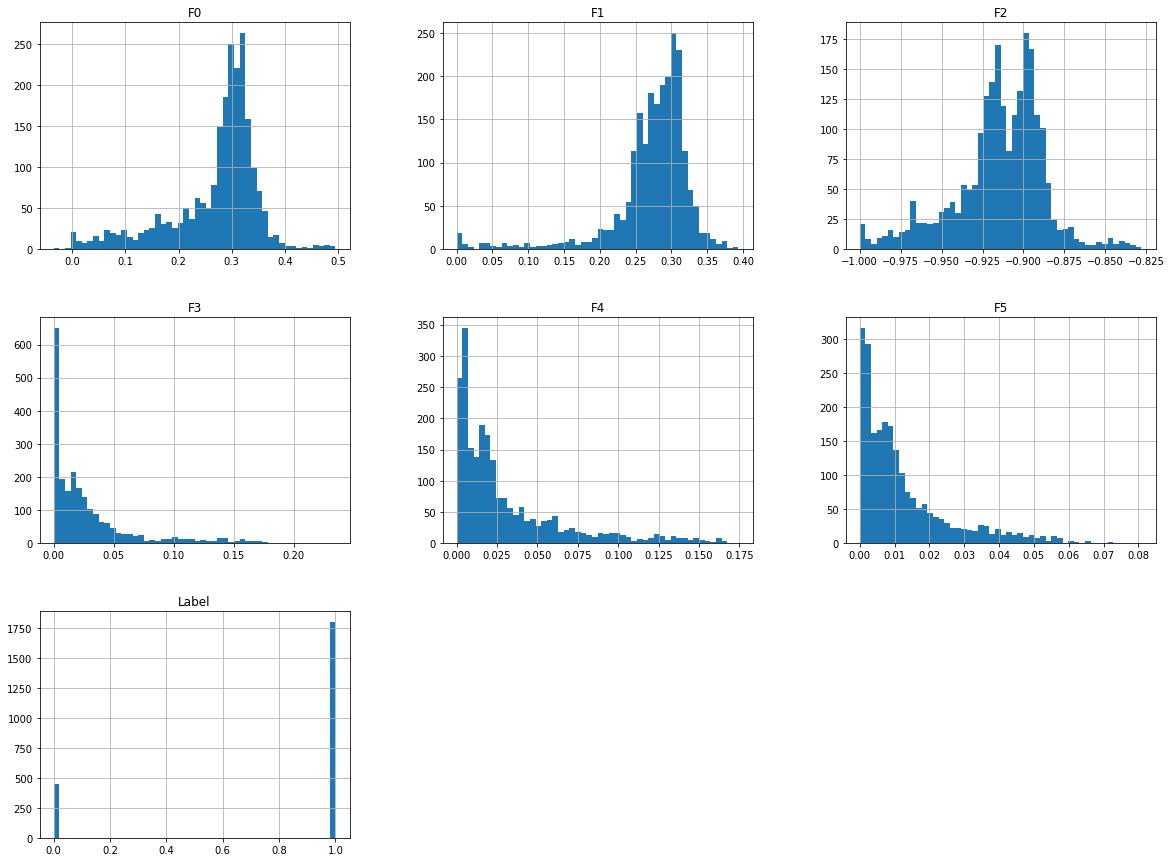

In [55]:
data.hist(bins=50,figsize=(20,15))

In [4]:
train_set, test_set=train_test_split(data,test_size=0.2,random_state=42)
train_data=data.copy()

In [5]:
correlation_matrix=train_data.corr()
correlation_matrix['Label'].sort_values(ascending=False)

Label    1.000000
F1       0.114751
F0       0.098540
F2       0.000601
F4      -0.405060
F5      -0.419292
F3      -0.423992
Name: Label, dtype: float64

# Preparing the Data

In [6]:
train_data = train_set.drop('Label', axis=1)
train_labels = train_set['Label'].copy()
train_data.head()

,F0,F1,F2,F3,F4,F5
121,0.316162,0.293356,-0.901531,0.010711,0.030875,0.012595
173,0.342953,0.328651,-0.879980,0.000991,0.002371,0.001007
1245,0.157628,0.227237,-0.958732,0.040457,0.047689,0.020932
1323,0.011324,0.099787,-0.991258,0.033611,0.077369,0.014335
999,0.263980,0.299922,-0.915451,0.034215,0.030451,0.014590


In [7]:
test_data = test_set.drop('Label', axis=1)
test_labels = test_set['Label'].copy()
test_data.shape

(451, 6)

Checking for any null or NAN values in training dataset

In [8]:
sample_incomplete_rows = train_data[train_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,F0,F1,F2,F3,F4,F5


Checking for any null or NAN values in test dataset

In [9]:
sample_incomplete_rows = test_data[test_data.isnull().any(axis=1)].head()
sample_incomplete_rows

,F0,F1,F2,F3,F4,F5


# Binary Classification

In [10]:
X=np.array(train_data)
# X=X[:,(0,1,2,3,4)]
Y=np.array(train_labels).flatten()
print(X.shape)
# print(Y)
print(test_data.shape)
test_data=np.array(test_data)
print(test_data.shape)
# test_data=test_data[:,(0,1,2,3,4)]
test_labels=np.array(test_labels).flatten()

(1803, 6)
(451, 6)
(451, 6)


In [11]:
# Y=(Y==2).astype(np.int) # to map true and false to 1 and 0 respectively
# print(Y)

# Nearest Neighbours

In [12]:
predicted_labels=[]
for i in range(len(test_data)):
    # euclidean distance
    minimum_distance=((np.dot(test_data[i],test_data[i]))-2*(np.dot(test_data[i],X[0]))+(np.dot(X[0],X[0])))**0.5
    closest_neighbour=Y[0]
    for j in range(1,len(X)):
        # euclidean distance
        distance=((np.dot(test_data[i],test_data[i]))-2*(np.dot(test_data[i],X[j]))+(np.dot(X[j],X[j])))**0.5
        if(distance < minimum_distance):
            minimum_distance=distance
            closest_neighbour=Y[j]
    predicted_labels.append(closest_neighbour)
# print(predicted_labels)

# Accuracy score - Nearest Neighbours

In [13]:
metrics.accuracy_score(test_labels,predicted_labels)

0.82039911308203994

# Precision - Nearest Neighbours

In [14]:
metrics.precision_score(test_labels,predicted_labels)

0.88154269972451793

# F-measure - Nearest Neighbours

In [15]:
metrics.f1_score(test_labels, predicted_labels)

0.88765603328710119

# Recall - Nearest Neighbours

In [16]:
metrics.recall_score(test_labels,predicted_labels)

0.8938547486033519

# AUC - Nearest Neighbours

In [17]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)

0.7157445786027512

# Naive Bayes Classifier

In [18]:
# Assuming data is fitted to a Gaussian
def probability(mean, std, x):
    exponential=np.exp(-1*(x-mean)**2/(2*(std**2)))
    return ((1/(std*((22/7.0)**0.5)))*(exponential))

In [19]:
# Fitting Gausian
def gaussian_parameters(X):
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    return (mean,std)

The following code is to get data points corresponding to each class

In [20]:
data_class1= [X[i] for i in range(len(Y)) if Y[i]==1] # class1 refers to data corresponding to flower Iris-Virginica
data_class2= [X[i] for i in range(len(Y)) if Y[i]==0] # class2 refers to data does not corresponds to flower Iris-Virginica  
# print(data_class1)
# print(data_class2)

In [21]:
(mean_class1,std_class1)=gaussian_parameters(data_class1) # get each features gaussian parameters if their class is class1
(mean_class2,std_class2)=gaussian_parameters(data_class2) # get each features gaussian parameters if their class is class2
print(mean_class1,std_class1)
print(mean_class2,std_class2)
total_class1=0
for i in range(len(Y)):
    if(Y[i]==1):
        total_class1=total_class1+1
class1_probability=float(total_class1)/len(Y)
class2_probability=1-class1_probability
# print(class1_probability)
# print(class2_probability)

[ 0.27275833  0.27629228 -0.91505086  0.02149636  0.02447165  0.00998435] [ 0.07701756  0.05030887  0.02520819  0.028639    0.02749351  0.01060775]
[ 0.25815646  0.26298302 -0.91339238  0.05881004  0.0575178   0.02286286] [ 0.10439324  0.07595079  0.03558553  0.0486533   0.04528142  0.01641784]


In [22]:
predicted_labels=[]
for i in range(len(test_data)):
    probability_class1=1
    probability_class2=1
    for j in range(len(test_data[i])):
        probability_class1=probability_class1*probability(mean_class1[j],std_class1[j],test_data[i][j])
        probability_class2=probability_class2*probability(mean_class2[j],std_class2[j],test_data[i][j])
    probability_class1=probability_class1*class1_probability
    probability_class2=probability_class2*class2_probability
#     print(probability_class1,probability_class2)
    if(probability_class1>probability_class2):
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)

# Accuracy score - Naive Bayes Classifier

In [23]:
metrics.accuracy_score(test_labels,predicted_labels)
# print(predicted_labels)

0.82483370288248337

# Precision - Naive Bayes Classifier

In [24]:
metrics.precision_score(test_labels,predicted_labels)

0.88010899182561309

# F-measure - Naive Bayes Classifier

In [25]:
metrics.f1_score(test_labels, predicted_labels)

0.89103448275862063

# Recall - Naive Bayes Classifier

In [26]:
metrics.recall_score(test_labels,predicted_labels)

0.9022346368715084

# AUC - Naive Bayes Classifier

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)

0.71455817865080795

In [28]:
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X, Y)
 
# # making predictions on the testing set
# y_pred = gnb.predict(test_data)
# print(y_pred)
 
# # comparing actual response values (y_test) with predicted response values (y_pred)
# from sklearn import metrics
# print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(test_labels, y_pred)*100)

# Logistic Regression - Gradient Descent

Create a copy of features of test data and insert value "1" as first feature in every data point of test_data

In [29]:
X_data=np.copy(X)
X_data=np.insert(X_data, 0, values=[1], axis=1)

In [30]:
def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))
def gradient_descent_logistic_regression(X_data,Y,learning_rate,number_iterations):
    theta=np.zeros(X_data.shape[1])
    for i in range(number_iterations):
        z=np.dot(X_data,theta)
        p=sigmoid(z)
        gradient=np.dot(X_data.T, (p - Y)) / Y.size
#         print(theta)
#         print(gradient)
        theta=theta-learning_rate*gradient
    return theta

In [31]:
# print(X_data.shape)
learning_rate=0.1
number_iterations=300000
theta=gradient_descent_logistic_regression(X_data,Y,learning_rate,number_iterations)
print(theta)

[ -6.69700166   1.18862867  -4.24558523 -10.98122326 -15.24727489
 -13.03569084  -5.87793622]


In [32]:
test_data_new=np.copy(test_data)
test_data_new=np.insert(test_data_new, 0, values=[1], axis=1);
predicted_labels=[]
for i in range(len(test_data_new)):
    if(sigmoid(np.dot(test_data_new[i],theta))>0.5):
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)
# print(predicted_labels)

# Accuracy score - Logistic Regression (Gradient Descent)

In [33]:
metrics.accuracy_score(test_labels,predicted_labels)

0.83813747228381374

# Precision - Logistic Regression (Gradient Descent)

In [34]:
metrics.precision_score(test_labels,predicted_labels)

0.84841075794621024

# F-measure - Logistic Regression (Gradient Descent)

In [35]:
metrics.f1_score(test_labels, predicted_labels)

0.90482398956975219

# Recall - Logistic Regression (Gradient Descent)

In [36]:
metrics.recall_score(test_labels,predicted_labels)

0.96927374301675973

# AUC - Logistic Regression (Gradient Descent)

In [37]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)

0.65130353817504649

# Logistic Regression - Newton's method

In [38]:
def newton_method_logistic_regression(X_data,Y,number_iterations):
    theta=np.zeros(X_data.shape[1])
    for i in range(number_iterations):
        z=np.dot(X_data,theta)
        p=sigmoid(z)
        gradient=np.dot(X_data.T, (p - Y)) / Y.size
        learning_rate=np.linalg.inv(np.dot(X_data.T,X_data)/ Y.size)
#         print(theta)
#         print(gradient)
        theta=theta-np.dot(learning_rate,gradient)
    return theta

In [39]:
theta=newton_method_logistic_regression(X_data,Y,number_iterations)
print(theta)

[-75.08704932  18.96394953   5.9977611  -77.36918971  -8.01761741
  -5.84760693 -28.48742071]


In [40]:
predicted_labels=[]
for i in range(len(test_data_new)):
    if(sigmoid(np.dot(test_data_new[i],theta))>0.5):
        predicted_labels.append(1)
    else:
        predicted_labels.append(0)

# Accuracy score - Logistic Regression (Newton's method)

In [41]:
metrics.accuracy_score(test_labels,predicted_labels)

0.85144124168514412

# Precision - Logistic Regression (Newton's method)

In [42]:
metrics.precision_score(test_labels,predicted_labels)

0.86649874055415621

# F-measure - Logistic Regression (Newton's method)

In [43]:
metrics.f1_score(test_labels, predicted_labels)

0.91125827814569527

# Recall - Logistic Regression (Newton's method)

In [44]:
metrics.recall_score(test_labels,predicted_labels)

0.96089385474860334

# AUC - Logistic Regression (Newton's method)

In [45]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)

0.69550069081516197

# Logistic Regression (Library)

In [46]:
logistic_regression=LogisticRegression()
logistic_regression.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
# logistic_regression.predict_proba([[5,2]])

In [48]:
predicted_labels=logistic_regression.predict(test_data) # prediction of labels for test data

# Accuracy score - Logistic Regression (library)

In [49]:
metrics.accuracy_score(test_labels,predicted_labels)

0.80044345898004432

# Precision - Logistic Regression (library)

In [50]:
metrics.precision_score(test_labels,predicted_labels)

0.80316742081447967

# F-measure - Logistic Regression (library)

In [51]:
metrics.f1_score(test_labels, predicted_labels)

0.88749999999999996

# Recall - Logistic Regression (library)

In [52]:
metrics.recall_score(test_labels,predicted_labels)

0.99162011173184361

# AUC - Logistic Regression (library)

In [53]:
fpr, tpr, thresholds = metrics.roc_curve(test_labels, predicted_labels)
metrics.auc(fpr, tpr)

0.52806812038205087